총 4개의 파일을 찾았습니다. 분석을 시작합니다.

--- 분석 중인 파일: 095522039.m4a ---
Original Sample Rate: 44100 Hz
결과를 시각화합니다...


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

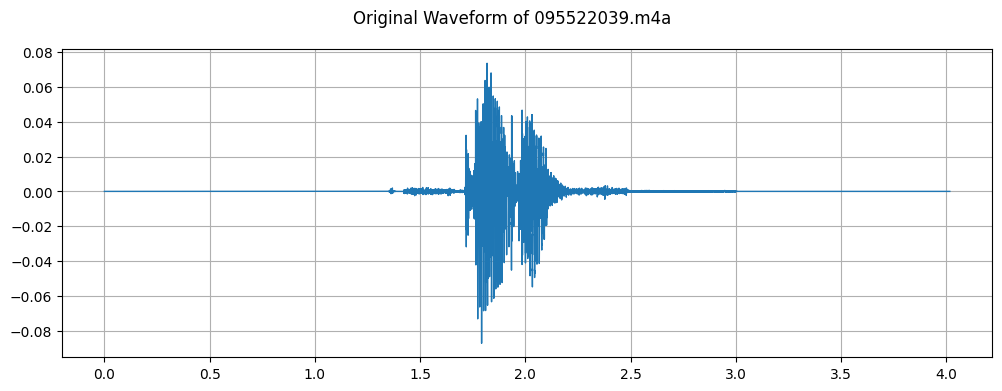

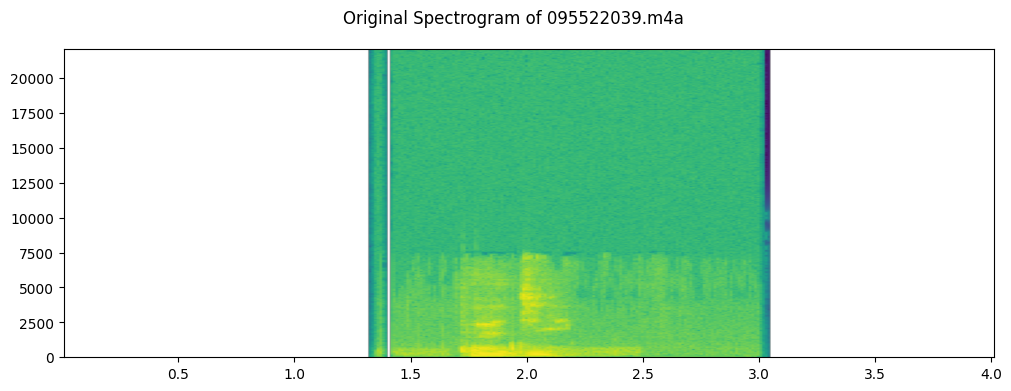

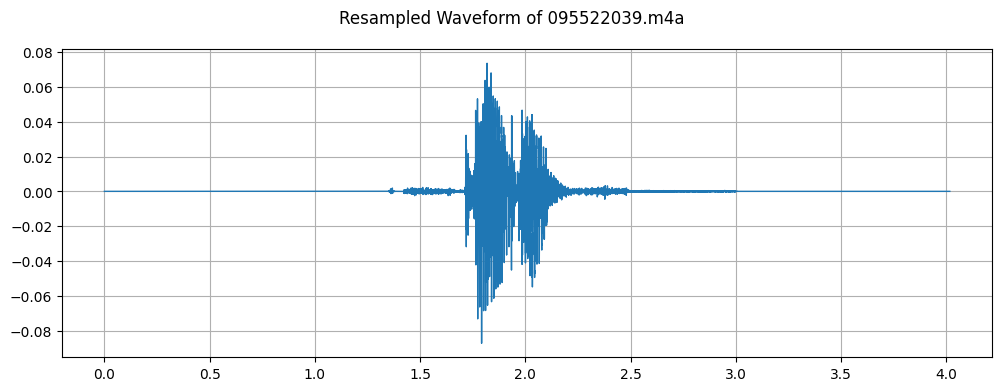

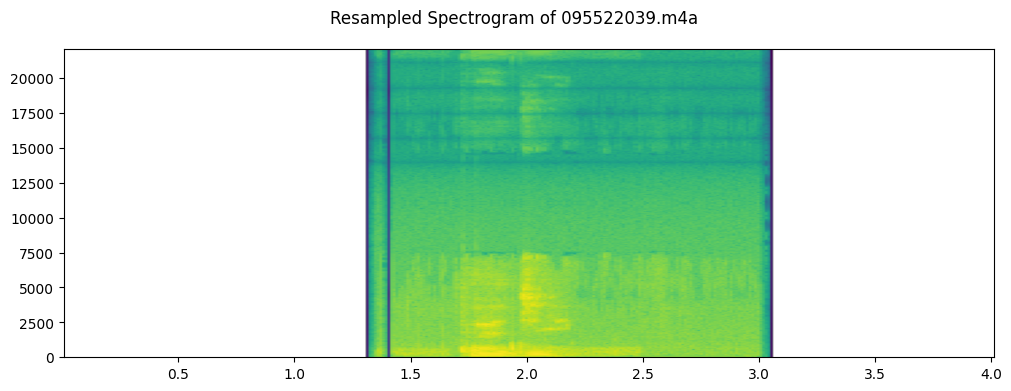

--------------------------------------------------

--- 분석 중인 파일: 095522040.m4a ---
Original Sample Rate: 44100 Hz
결과를 시각화합니다...


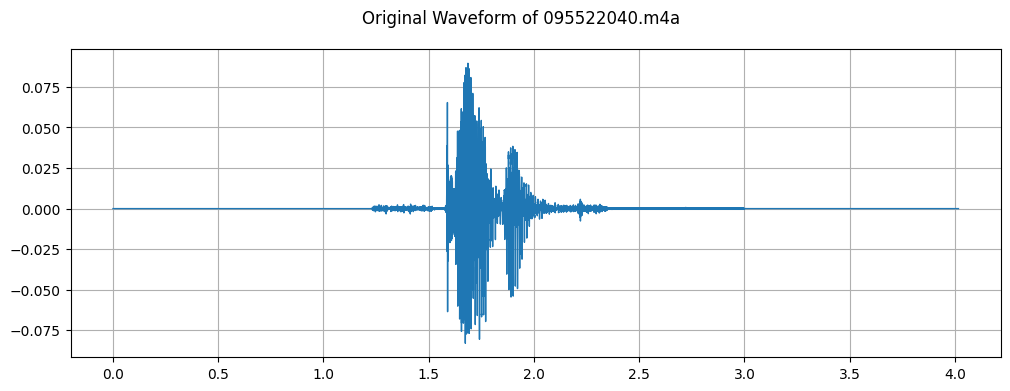

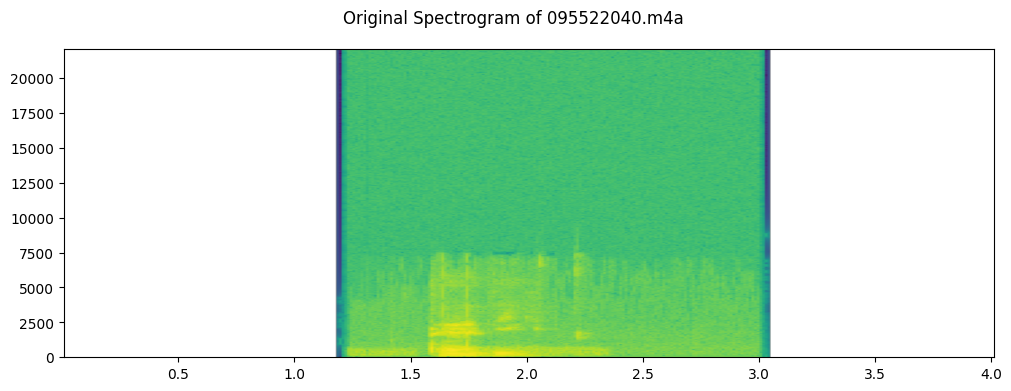

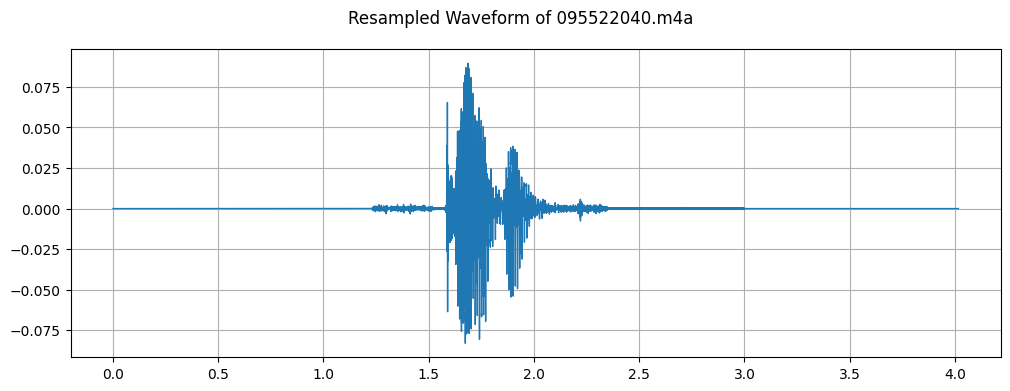

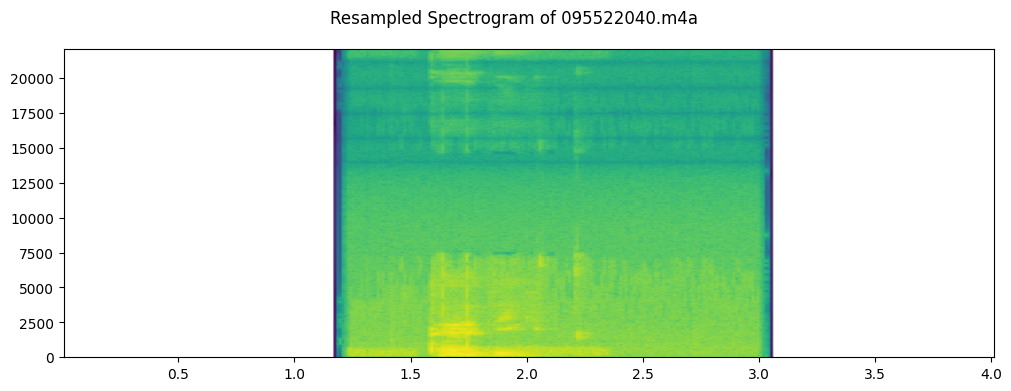

--------------------------------------------------

--- 분석 중인 파일: 095522041.m4a ---
Original Sample Rate: 44100 Hz
결과를 시각화합니다...


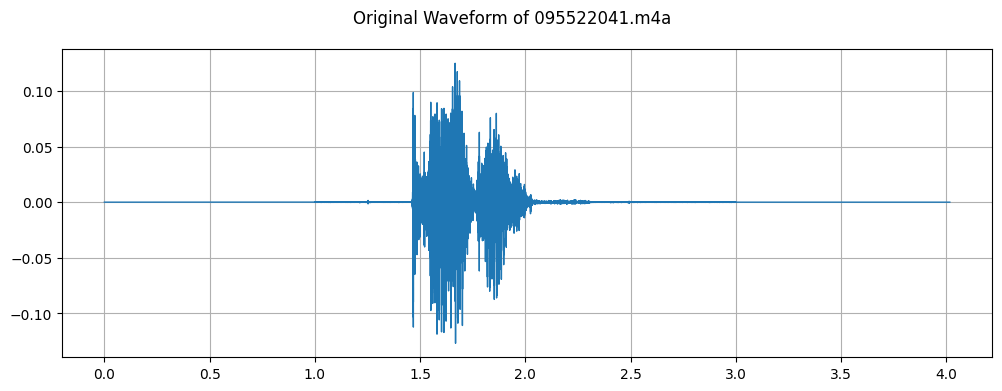

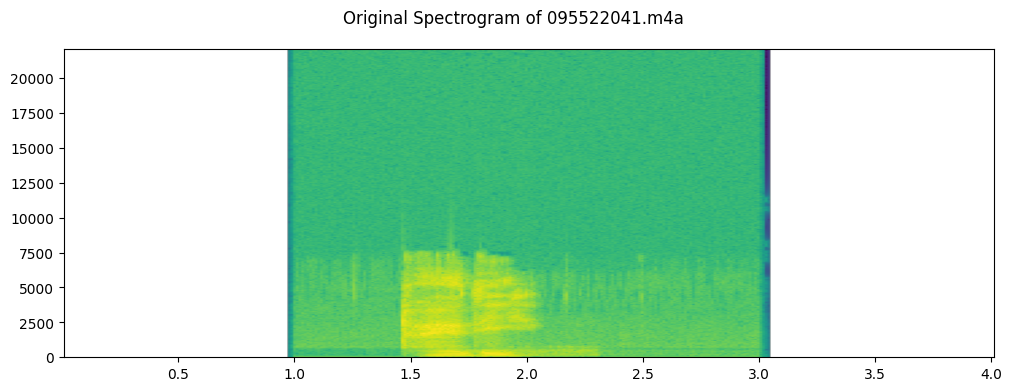

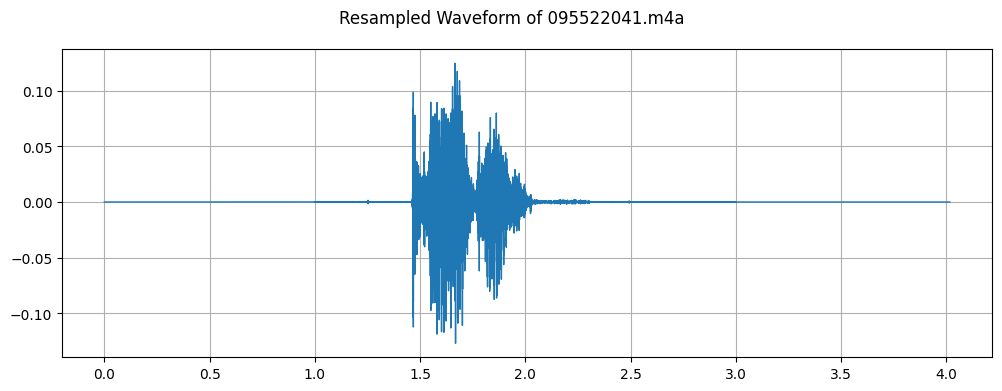

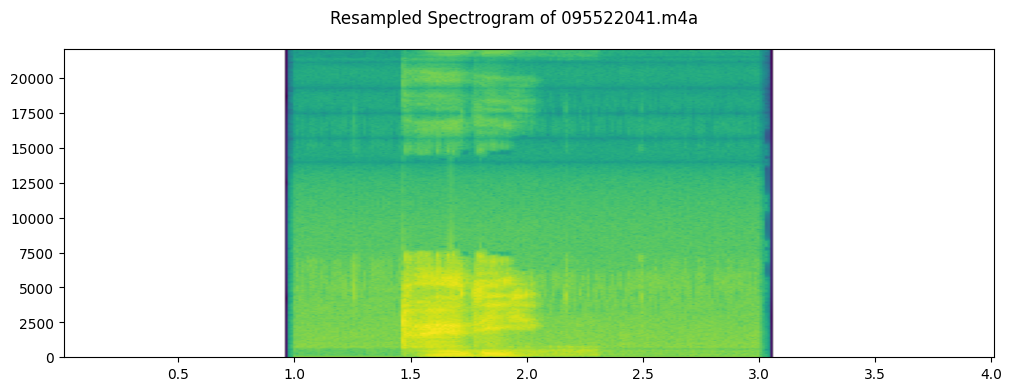

--------------------------------------------------

--- 분석 중인 파일: 095522042.m4a ---
Original Sample Rate: 44100 Hz
결과를 시각화합니다...


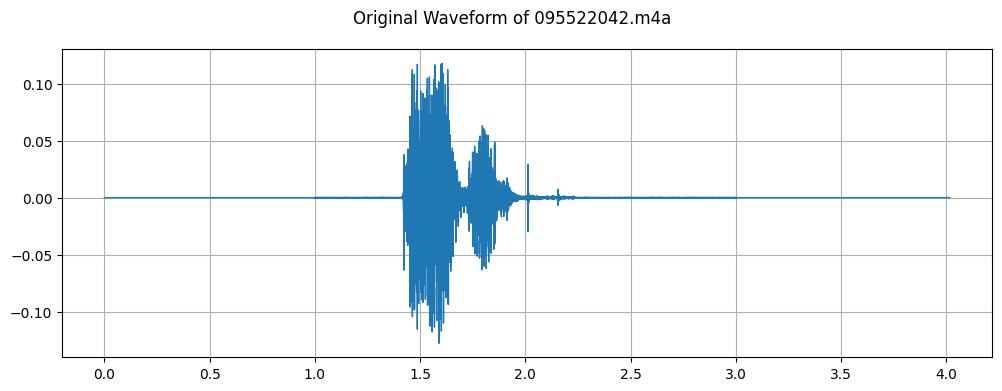

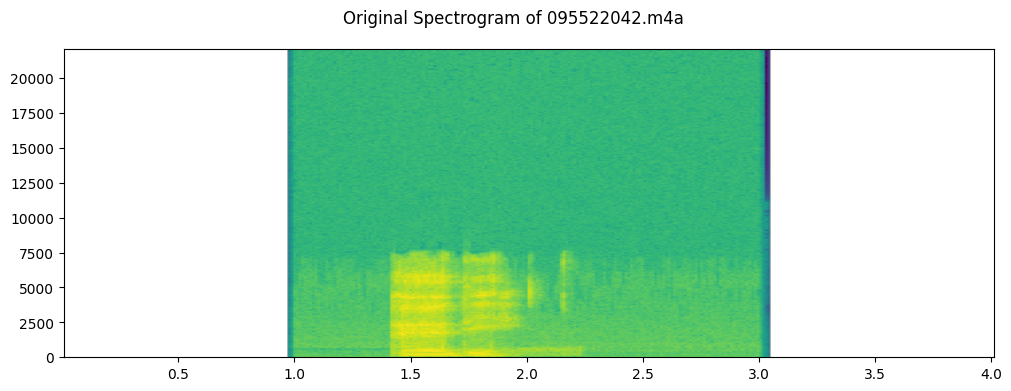

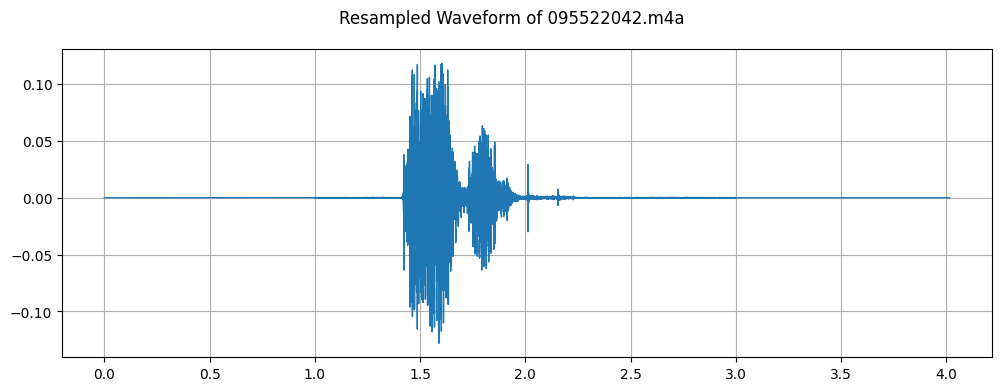

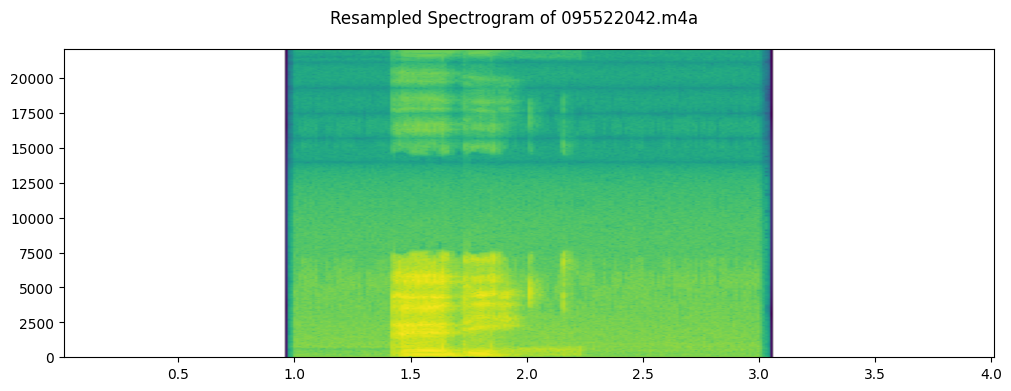

--------------------------------------------------

모든 파일에 대한 분석이 완료되었습니다.


In [17]:
  import torch
  import torchaudio
  import matplotlib.pyplot as plt
  import os
  import glob

  # --- 1. PyTorch 튜토리얼 스타일의 시각화 함수 정의 ---
  def plot_waveform(waveform, sample_rate, title="Waveform"):
      waveform = waveform.numpy()
      num_channels, num_frames = waveform.shape
      time_axis = torch.arange(0, num_frames) / sample_rate

      figure, axes = plt.subplots(num_channels, 1, figsize=(12, 4))
      if num_channels == 1:
          axes = [axes]
      for c in range(num_channels):
          axes[c].plot(time_axis, waveform[c], linewidth=1)
          axes[c].grid(True)
          if num_channels > 1:
              axes[c].set_ylabel(f"Channel {c+1}")
      figure.suptitle(title)

  def plot_specgram(waveform, sample_rate, title="Spectrogram"):
      waveform = waveform.numpy()
      num_channels, num_frames = waveform.shape

      figure, axes = plt.subplots(num_channels, 1, figsize=(12, 4))
      if num_channels == 1:
          axes = [axes]
      for c in range(num_channels):
          # NFFT 값을 조절하여 스펙트로그램의 해상도를 높일 수 있습니다.
          axes[c].specgram(waveform[c], Fs=sample_rate, NFFT=1024, noverlap=512)
          if num_channels > 1:
              axes[c].set_ylabel(f"Channel {c+1}")
      figure.suptitle(title)

  # --- 2. 오디오 파일 경로 설정 및 파일 목록 가져오기 ---
  audio_folder_path = "/content/audio_dataset"
  file_paths = glob.glob(os.path.join(audio_folder_path, '*.m4a'))

  if not file_paths:
      print(f"오류: '{audio_folder_path}' 폴더에서 오디오 파일(.m4a)을 찾을 수 없습니다.")
  else:
      print(f"총 {len(file_paths)}개의 파일을 찾았습니다. 분석을 시작합니다.\n")

  # --- 3. 각 오디오 파일에 리샘플링 분석 적용 ---
  for file_path in file_paths:
      try:
          file_name = os.path.basename(file_path)
          print(f"--- 분석 중인 파일: {file_name} ---")

          # 1. 원본 오디오 파일 불러오기
          original_waveform, original_sample_rate = torchaudio.load(file_path)

          # torchaudio.transforms는 float32 타입을 사용하므로 변환해줍니다.
          original_waveform = original_waveform.to(torch.float32)

          print(f"Original Sample Rate: {original_sample_rate} Hz")

          # 2. 2배 다운샘플링 수행
          resampled_rate = original_sample_rate // 2
          downsampler = torchaudio.transforms.Resample(
              orig_freq=original_sample_rate, new_freq=resampled_rate
          )
          downscaled_waveform = downsampler(original_waveform)

          # 3. 다시 원래 샘플링 레이트로 2배 업샘플링 수행
          upsampler = torchaudio.transforms.Resample(
              orig_freq=resampled_rate, new_freq=original_sample_rate
          )
          resampled_waveform = upsampler(downscaled_waveform)

          # 4. 결과 시각화 비교
          print("결과를 시각화합니다...")

          # 원본 시각화
          plot_waveform(original_waveform, original_sample_rate, title=f"Original Waveform of {file_name}")
          plot_specgram(original_waveform, original_sample_rate, title=f"Original Spectrogram of {file_name}")
          plt.show() # 원본 그래프들을 먼저 보여줍니다.

          # 리샘플링 후 결과 시각화
          plot_waveform(resampled_waveform, original_sample_rate, title=f"Resampled Waveform of {file_name}")
          plot_specgram(resampled_waveform, original_sample_rate, title=f"Resampled Spectrogram of {file_name}")
          plt.show() # 리샘플링 후 그래프들을 보여줍니다.

          print("-" * 50 + "\n")

      except Exception as e:
          print(f"'{file_name}' 파일 처리 중 오류 발생: {e}")
          print("-" * 50 + "\n")

  print("모든 파일에 대한 분석이 완료되었습니다.")

2배 다운스케일링후 2배 업스케일링